## Logistic Regression

Logistic Regression is a statistical method used for binary classification problems in machine learning. Despite its name, logistic regression is primarily used for classification rather than regression tasks. It models the probability of the occurrence of a binary outcome by fitting data to a logistic function, also known as the sigmoid function.


In [55]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor


In [3]:
# Read the health_dataset_stroke_data.csv file and display it's content
df = pd.read_csv('/content/healthcare_dataset_stroke_data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [22]:
# Drop column id from the dataframe
df.drop(['id'], axis=1, inplace=True)

In [23]:
# Get the description of the data
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
# Find the null values for each variable
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# Drop the null values
df.dropna(inplace=True)

In [7]:
# Get the shape of dataframe
df.shape

(4909, 12)

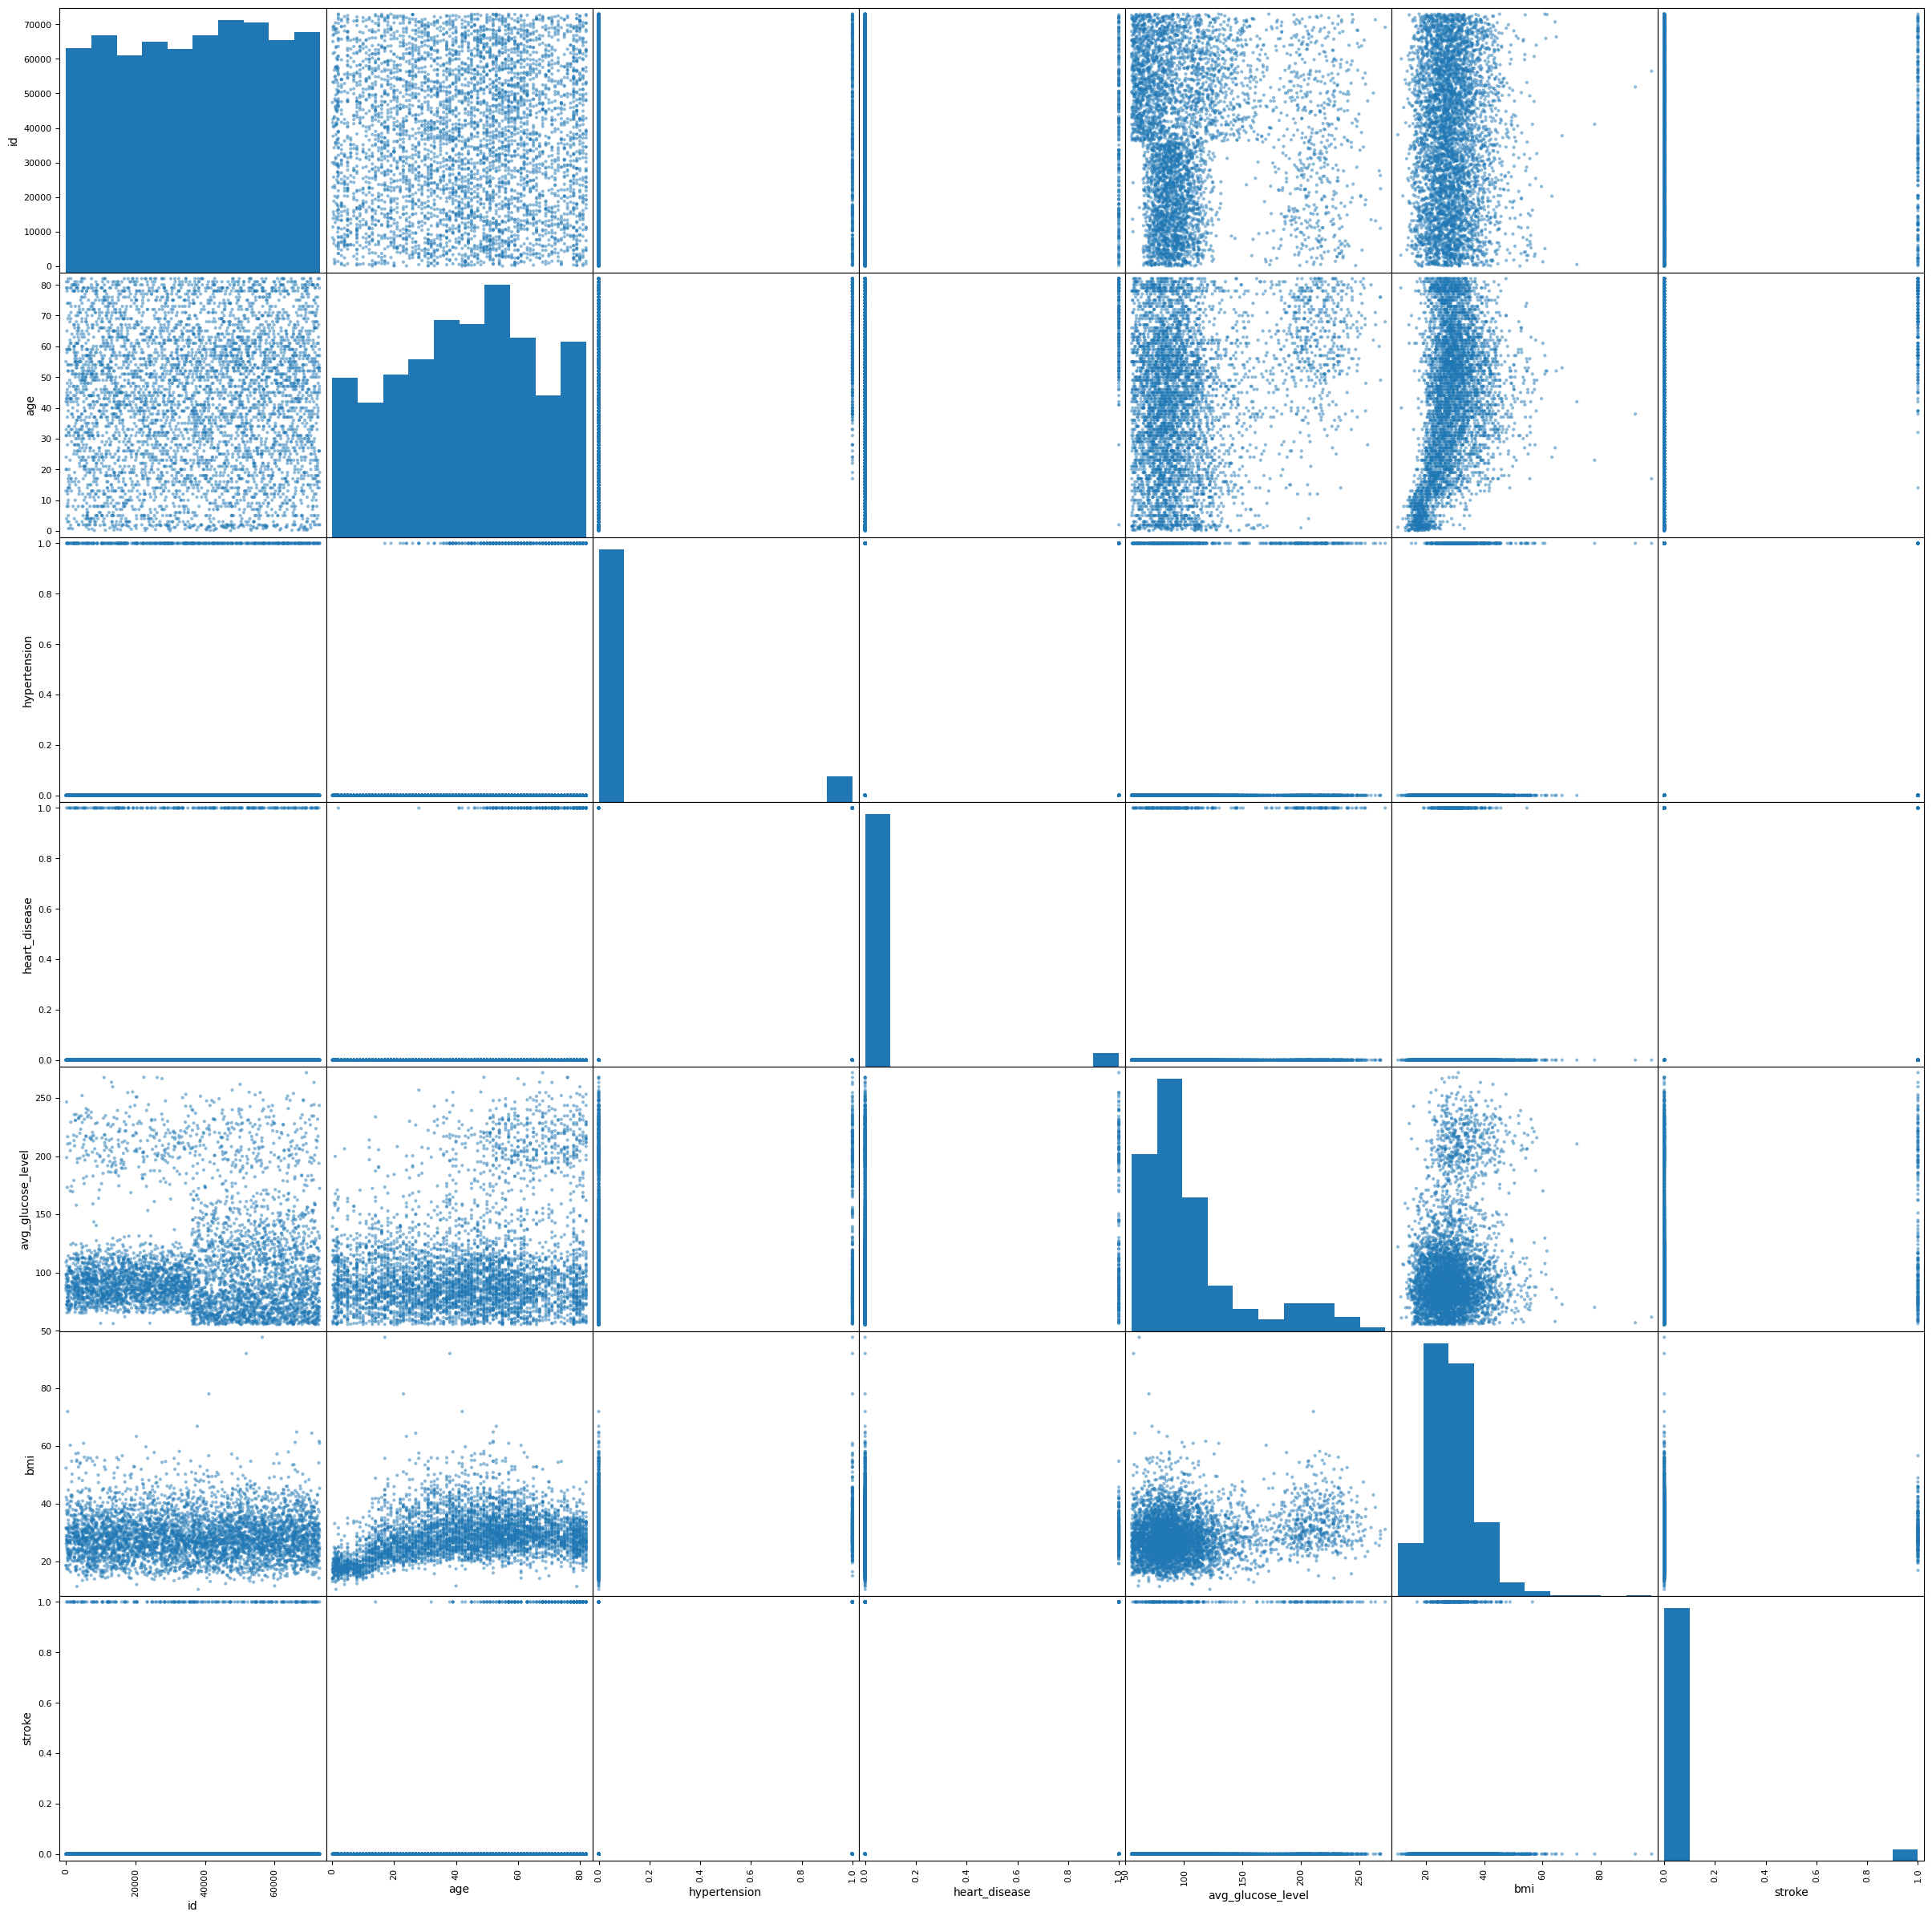

In [8]:
pd.plotting.scatter_matrix(df, figsize = [30,30]);
plt.show()

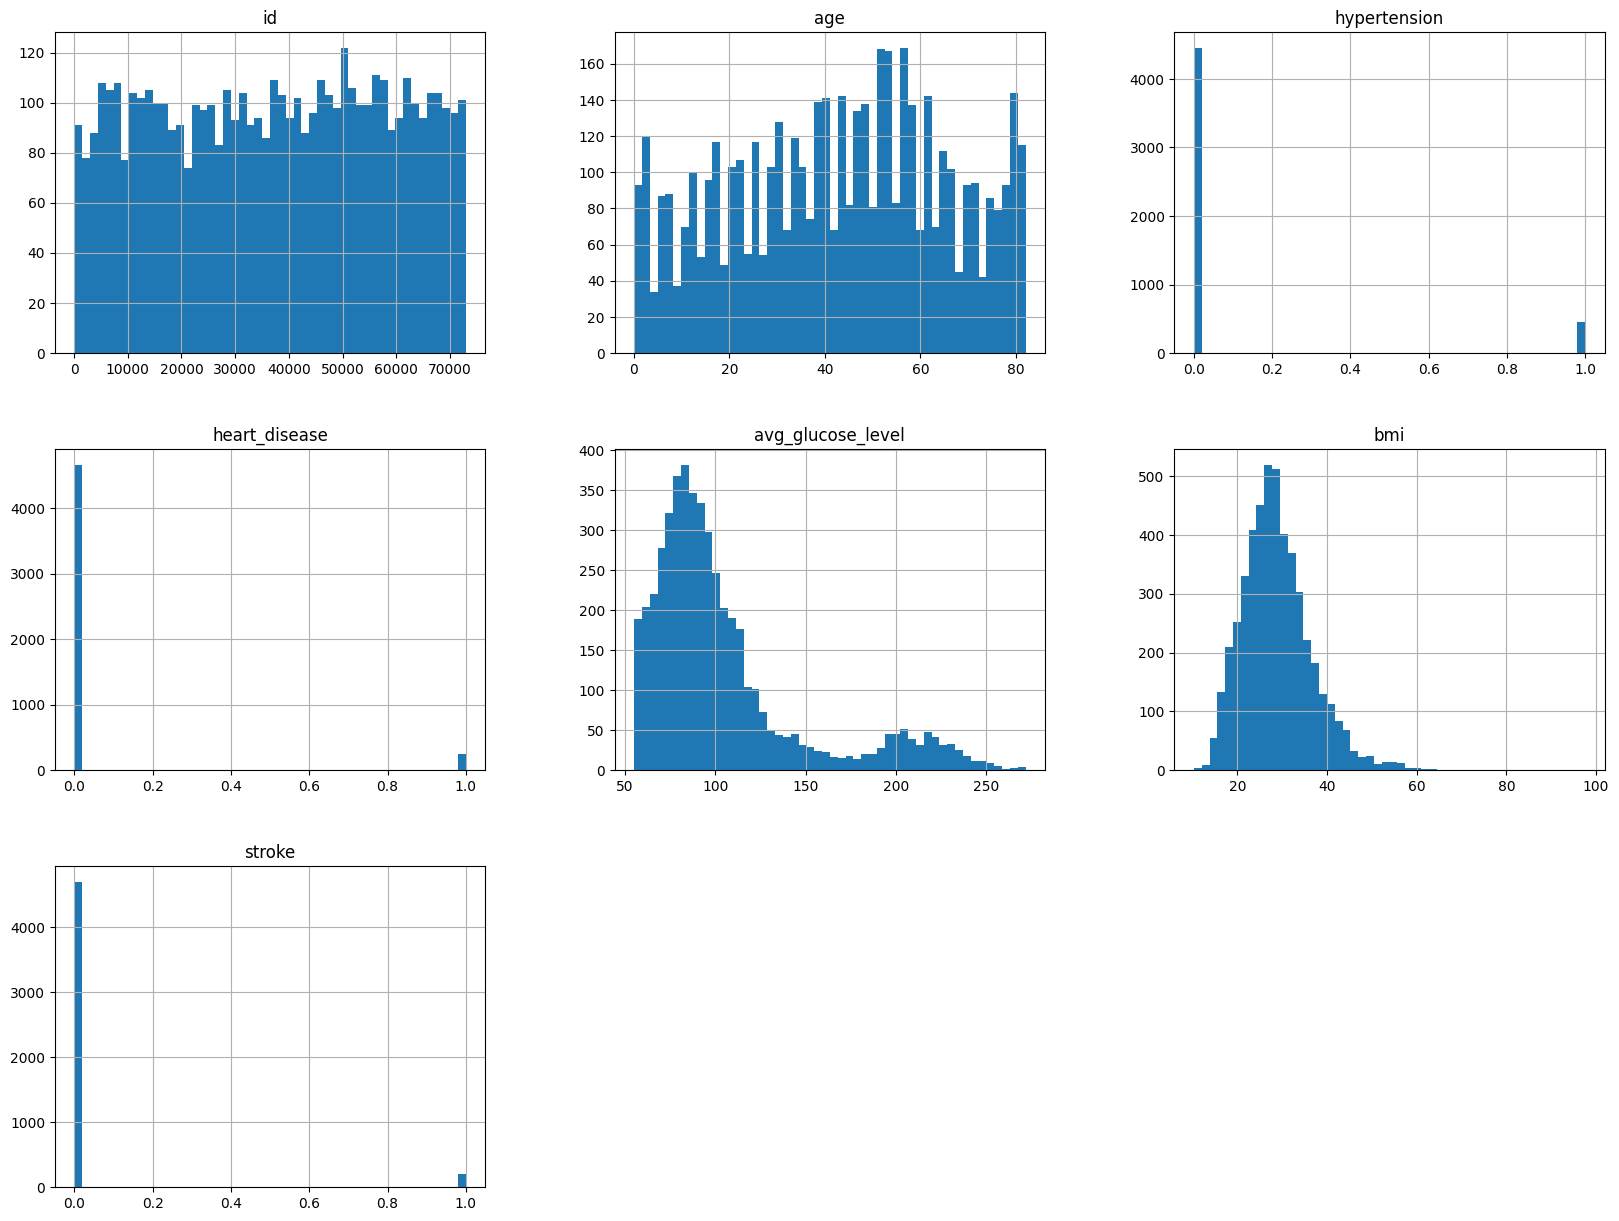

In [9]:
# Plot Histogram plot of numeric variables
df.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

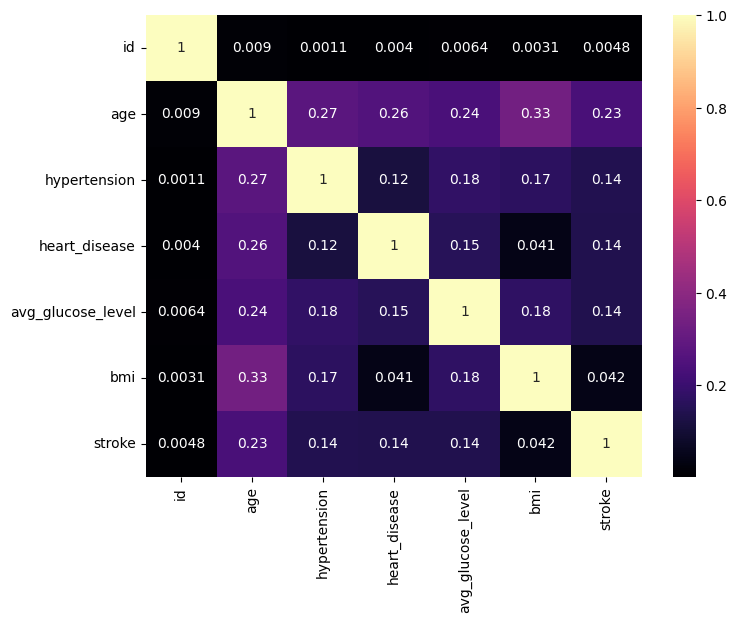

In [12]:
# Plot the correlation map

#Define size ofthe plot
plt.subplots(figsize=(8,6))
#Plot heatmap of correlation between columns
sns.heatmap(df.corr(), annot=True, cmap='magma')

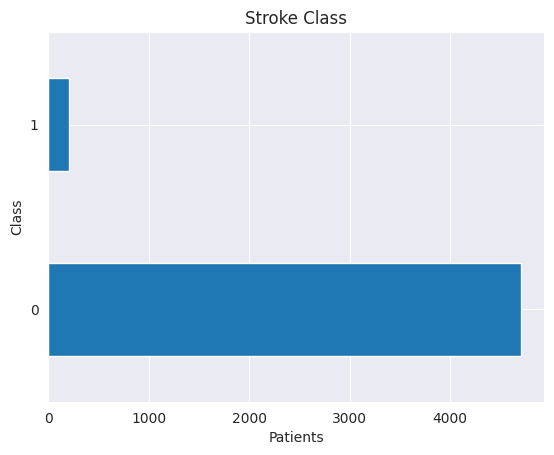

In [52]:
# Display the count of output variable stroke using bar chat

df['stroke'].value_counts().plot(kind='barh')
plt.title('Stroke Class')
plt.xlabel('Patients')
plt.ylabel('Class')
plt.show()

## One Hot Encoding

In [24]:
# Perform one hot encoding on categorical variables

# first convert categorical variables to dummy variables using one hot encoding
categorical_var = ['gender','ever_married','work_type','Residence_type','smoking_status']

# create dummy variables for all the other categorical variables
for variable in categorical_var:
#   create dummy variables for given columns
    dummies = pd.get_dummies(df[variable],prefix=variable)
    df = pd.concat([df,dummies],axis=1)
    df.drop([variable],axis=1,inplace=True)

df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [27]:
# Split the data in test and training

# Building the model
x = df.drop(['stroke'], axis=1)
y = df['stroke']

# split train and test dataset
train_x, test_x, train_y, test_y = train_test_split(x,y , test_size=0.3, random_state=20)

print("Training input variable size:", train_x.shape)
print("Training output variable size", train_y.shape)

print("Testing input variable size:", test_x.shape)
print("Testing input variable size:", test_y.shape)

Training input variable size: (3436, 21)
Training output variable size (3436,)
Testing input variable size: (1473, 21)
Testing input variable size: (1473,)


In [30]:
# Build Logistic regression model, fit, predict and evaluate the score of the model

#Create an instance of linear model
lr = LogisticRegression()
#Fit the model to data
model = lr.fit(train_x, train_y)

# Model Score
score = model.score(test_x,test_y)

# Predict the value of text_x data
pred_y = lr.predict(test_x)

# Print the score
print('Score: ', score)

Score:  0.9585879158180584


### Accuracy, Recall, Precision, and F1 Score

Accuracy, Recall, Precision, and F1 Score are metrics commonly used to evaluate the performance of classification models. These metrics provide insights into different aspects of a model's effectiveness in making predictions on a given dataset.

1. Accuracy:

Formula:
Accuracy
=
Number of Correct Predictions /
Total Number of Predictions​

Interpretation: Accuracy measures the overall correctness of the model by calculating the ratio of correctly predicted instances to the total number of instances. While accuracy is a commonly used metric, it may not be suitable for imbalanced datasets.

2. Recall (Sensitivity or True Positive Rate):

Formula:
Recall
=
True Positives /
(True Positives + False Negatives)

Interpretation: Recall evaluates the ability of a model to correctly identify all relevant instances (true positives) out of the total instances that actually belong to the positive class. It is particularly important in situations where missing positive instances (false negatives) is a critical concern.

3. Precision (Positive Predictive Value):

Formula:
Precision
=
True Positives /
(True Positives + False Positives​)

Interpretation: Precision measures the accuracy of positive predictions by calculating the ratio of true positives to the total predicted positives. It is valuable in scenarios where the cost of false positives is high.

4. F1 Score:

Formula:
F1 Score = 2×(Precision×Recall) /
(Precision + Recall)

Interpretation: The F1 Score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is useful when there is an uneven class distribution. The F1 Score reaches its best value at 1 (perfect precision and recall) and worst at 0.

In [29]:
# find the Accuracy, Recall, F1 Score and Precision

print('Accuracy: '  + str(metrics.accuracy_score(test_y, pred_y)))
print('Recall: ' + str(metrics.recall_score(test_y, pred_y)))
print('F1 Score: ' + str(metrics.f1_score(test_y, pred_y)))
print('Precision: ' + str(metrics.precision_score(test_y, pred_y)))

## Confusion Matrix

A confusion matrix is a table that is often used to evaluate the performance of a classification algorithm. It summarizes the predictions of a model on a classification problem in terms of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) outcomes. The matrix is especially useful when dealing with imbalanced datasets.

True Positive (TP): Instances that are actually positive and are correctly predicted as positive.

True Negative (TN): Instances that are actually negative and are correctly predicted as negative.

False Positive (FP): Instances that are actually negative but are incorrectly predicted as positive.

False Negative (FN): Instances that are actually positive but are incorrectly predicted as negative.

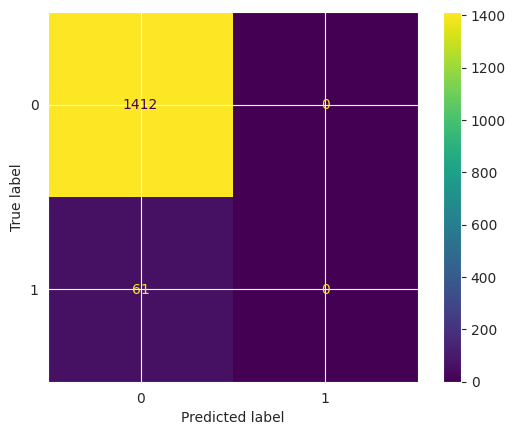

In [41]:
cm = metrics.confusion_matrix(test_y, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# Create dataframe to show Actual and Predicted values

df_predicted = pd.DataFrame({'Actual': test_y, 'Predicted': pred_y})
df_predicted.head(30)

### Decision Tree

In [47]:
# Make Prediction Using Desicion Tree

clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
clf.fit(train_x, train_y)

# Make predictions on the test set
pred_y = clf.predict(test_x)


In [44]:
# find the Accuracy, Recall, F1 Score and Precision

print('Accuracy: '  + str(metrics.accuracy_score(test_y, pred_y)))
print('Recall: ' + str(metrics.recall_score(test_y, pred_y)))
print('F1 Score: ' + str(metrics.f1_score(test_y, pred_y)))
print('Precision: ' + str(metrics.precision_score(test_y, pred_y)))

Accuracy: 0.9083503054989817
Recall: 0.06557377049180328
F1 Score: 0.05594405594405595
Precision: 0.04878048780487805


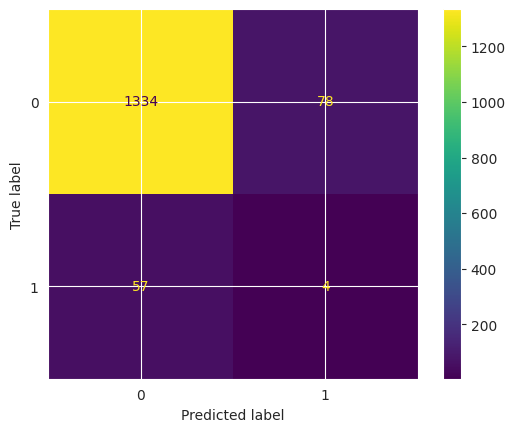

In [45]:
# Create Confusion Matrxi

cm = metrics.confusion_matrix(test_y, pred_y)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
df_predicted = pd.DataFrame({'Actual': test_y, 'Predicted': pred_y,2})
df_predicted.head(30)

## Handling Imbalanced Datasets

Handling imbalanced datasets is an important consideration in machine learning, especially in classification tasks. An imbalanced dataset occurs when the distribution of classes is not equal, and one class has significantly fewer samples than the others. Here are few techniques to address imbalanced datasets:

1. Under-sampling: Reduce the size of the majority class to match the minority class by randomly removing instances. This can help balance the class distribution but may result in loss of information.

  Over-sampling: Increase the size of the minority class by duplicating instances or generating synthetic examples (e.g., using techniques like SMOTE - Synthetic Minority Over-sampling Technique). This can help balance the class distribution but may lead to overfitting.

3. Generate Synthetic Samples:
Techniques like SMOTE (Synthetic Minority Over-sampling Technique) can generate synthetic samples for the minority class, helping to balance the class distribution.

In [ ]:
# Under Sampling

# select all rows having lable value 0
no_stroke = df[df['stroke'] == 0]
# select all rows having lable value 1
stroke = df[df['stroke'] == 1]

# create a limiter
limit = len(stroke) * 6

# limit the number of data points
no_stroke = no_stroke.sample(limit)
# Concat the data for 0 and 1
test_resample = pd.concat([no_stroke, stroke])
test_resample

In [90]:
train_resample_x = test_resample.drop(['stroke'], axis=1)
train_resample_y = test_resample['stroke']

In [91]:
# Build Logistic regression model, fit, predict and evaluate the score of the model

#Create an instance of linear model
lr = LogisticRegression()
#Fit the model to data
model = lr.fit(train_resample_x, train_resample_y)

# Model Score
score = model.score(test_x,test_y)

# Predict the value of text_x data
pred_y = lr.predict(test_x)

# Print the score
print('Score: ', score)

Score:  0.9361846571622539


In [92]:
# find the Accuracy, Recall, F1 Score and Precision

print('Accuracy: '  + str(metrics.accuracy_score(test_y, pred_y)))
print('Recall: ' + str(metrics.recall_score(test_y, pred_y)))
print('F1 Score: ' + str(metrics.f1_score(test_y, pred_y)))
print('Precision: ' + str(metrics.precision_score(test_y, pred_y)))

Accuracy: 0.9361846571622539
Recall: 0.16393442622950818
F1 Score: 0.17543859649122806
Precision: 0.18867924528301888


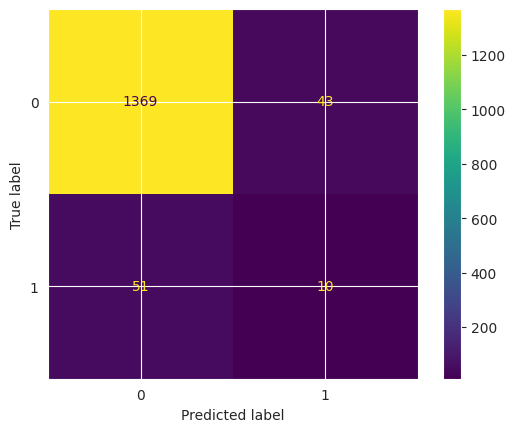

In [94]:
# Create Confusion Matrix
cm = metrics.confusion_matrix(test_y, pred_y)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [95]:
# Make Prediction Using Desicion Tree

clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
clf.fit(train_resample_x, train_resample_y)

# Make predictions on the test set
pred_y = clf.predict(test_x)


In [96]:
# find the Accuracy, Recall, F1 Score and Precision

print('Accuracy: '  + str(metrics.accuracy_score(test_y, pred_y)))
print('Recall: ' + str(metrics.recall_score(test_y, pred_y)))
print('F1 Score: ' + str(metrics.f1_score(test_y, pred_y)))
print('Precision: ' + str(metrics.precision_score(test_y, pred_y)))

Accuracy: 0.9137813985064495
Recall: 1.0
F1 Score: 0.4899598393574297
Precision: 0.324468085106383


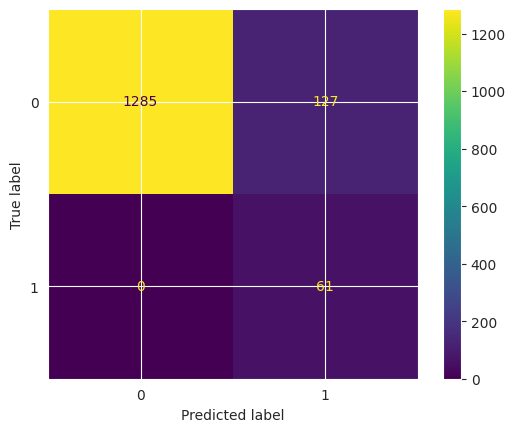

In [97]:
# Create confusion Matrix

cm = metrics.confusion_matrix(test_y, pred_y)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()